In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
data = {
    'x1': [7.82, -6.68, 4.36, 6.72, -8.64, -6.87, 4.47, 6.73, -7.71, -6.91,
           6.18, 6.72, -6.25, -6.94, 8.09, 6.81, -5.19, -6.38, 4.08, 6.27],
    'x2': [-4.58, 3.16, 2.19, 0.88, -3.06, 0.57, -2.62, -2.01, 2.34, -0.49,
           -2.81, -0.93, -0.26, -1.22, 0.20, 0.17, 4.24, -1.74, 1.30, 0.93],
    'x3': [-3.97, 2.71, 2.09, 2.80, 3.50, -5.45, 5.76, 4.18, -6.33, -5.68,
           5.82, -4.04, 0.56, 1.13, 2.25, -4.15, 4.04, 1.43, 5.33, -2.78]
}

df = pd.DataFrame(data)

**a-) Considere que existam três clusters e a inicialização dos centros seja aleatória**

In [ ]:
km = KMeans(n_clusters=3, init='random', random_state=42).fit(df)

centroids = km.cluster_centers_
labels = km.labels_

print("Centroides:", centroids)
#print("Labels:", labels)

Centroides: [[ 6.905      -1.1025     -3.735     ]
 [ 5.80428571 -0.41        4.03285714]
 [-6.84111111  0.39333333 -0.45444444]]


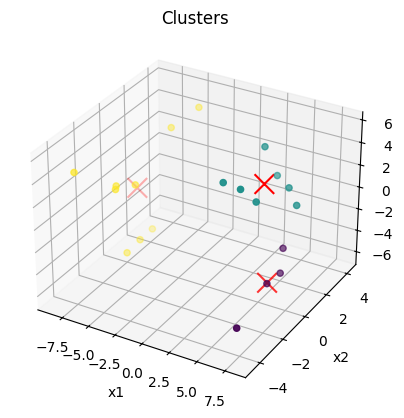

In [ ]:
df['Cluster'] = labels

#plotagem
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x1'], df['x2'], df['x3'], c=df['Cluster'], cmap='viridis')
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2],
           marker='x', color='red', s=200)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title('Clusters')
plt.show()

**b-) Considere que existam três clusters e a inicialização dos centros seja dada por m1=(0,0,0)t, m2=(0,-1,-1)t, m3=(1,1,2)t.**

In [ ]:
# Inicialização dos centróides
initial_centroids = np.array([[0, 0, 0], [0, -1, -1], [1, 1, 2]])

km_init = KMeans(n_clusters=3, init=initial_centroids, n_init=1,
                 random_state=42).fit(df[['x1', 'x2', 'x3']])
centroids_init = km_init.cluster_centers_
labels_init = km_init.labels_

print("Centroides (inicialização):", centroids_init)
#print("Labels (inicialização):", labels_init)

Centroides (inicialização): [[-6.84111111  0.39333333 -0.45444444]
 [ 6.905      -1.1025     -3.735     ]
 [ 5.80428571 -0.41        4.03285714]]


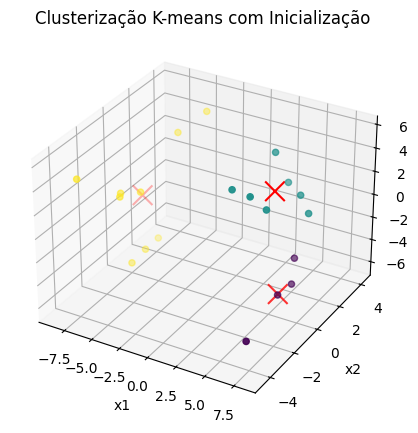

In [ ]:
df['Clusters Init'] = labels_init

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x1'], df['x2'], df['x3'], c=df['Cluster'], cmap='viridis')
ax.scatter(centroids_init[:, 0], centroids_init[:, 1],
           centroids_init[:, 2], marker='x', color='red', s=200)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title('Clusterização K-means com Inicialização')
plt.show()

**c-) Repita o item a considerando que os centros iniciais sejam m1=(-0.1,0,-0.1)t, m2=(0,--2,-3)t, m3=(1,-3,-5)t. Compare o resultado obtido com o item (a) e explique a razão da diferen-ças, incluindo o número de interações para alcançar a convergência.**

In [ ]:
#Inicialização dos centróides
initial_centroids2 = np.array([[-0.1,0,-0.1], [0,-2,-3], [1,-3,-5]])

#km_init2 = KMeans(n_clusters=3, init=initial_centroids2, n_init=1,
                 #random_state=42).fit(df[['x1', 'x2', 'x3']])
km_init2 = KMeans(n_clusters=3, init=initial_centroids2, n_init=1, max_iter=300, random_state=42)
km_init2.fit(df[['x1', 'x2', 'x3']])
centroids_init2 = km_init2.cluster_centers_
labels_init2 = km_init2.labels_

print("Centroides (inicialização):", centroids_init2)
#print("Labels (inicialização):", labels_init)


Centroides (inicialização): [[ 5.80428571 -0.41        4.03285714]
 [-6.84111111  0.39333333 -0.45444444]
 [ 6.905      -1.1025     -3.735     ]]


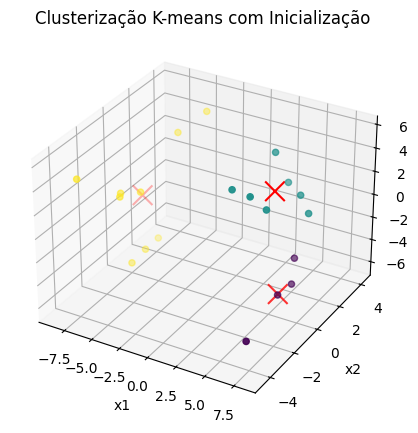

In [ ]:
df['Clusters Init'] = labels_init

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x1'], df['x2'], df['x3'], c=df['Cluster'], cmap='viridis')
ax.scatter(centroids_init2[:, 0], centroids_init2[:, 1],
           centroids_init2[:, 2], marker='x', color='red', s=200)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.title('Clusterização K-means com Inicialização')
plt.show()

In [ ]:
print("Número de iterações (inicialização aleatória):", km.n_iter_)
print("Número de iterações (inicialização manual):", km_init.n_iter_)
print("Número de iterações (inicialização manual):", km_init2.n_iter_)


Número de iterações (inicialização aleatória): 2
Número de iterações (inicialização manual): 3
Número de iterações (inicialização manual): 6


A inicialização aleatória selecionou centróides iniciais mais próximos dos agrupamentos reais, permitindo que o algoritmo convergisse rapidamente. Já com inicialização manual o algoritmo precisou de mais passos para ajustar os centróides e minimizar o erro quadrático.
